In [36]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import scipy.stats as st
from scipy.stats import randint as sp_randint
from scipy.stats import randint as sp_randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

import pydotplus

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Target Variable: Outcome (To detect whether a patient is Diabetic or not)
    
- Rows: 768 and columns: 9
        
- Data Types: float64(2), int64(7)
    
- There are no Null values present.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- Insulin have outliers present in the data and data is skewed.

- Other attributes also have skewness and outliers present in the data.

In [8]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- There are 500 Non-Diabetic patient and 268 Diabetic patient in the data.

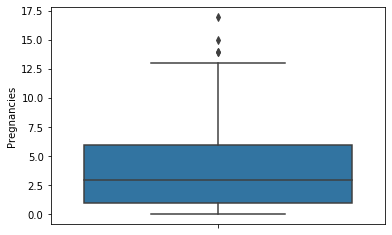

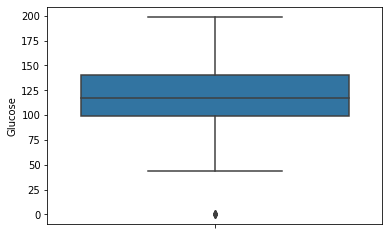

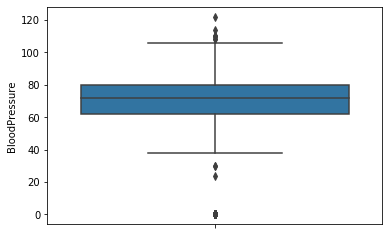

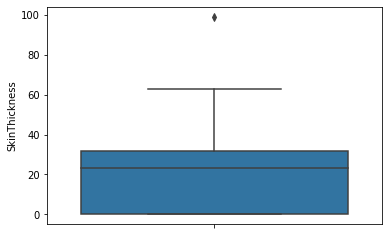

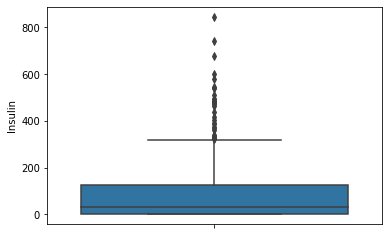

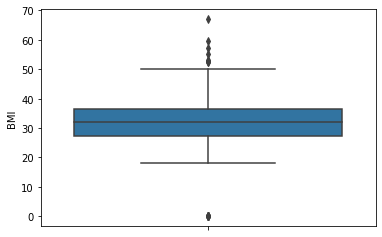

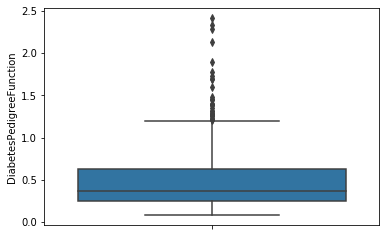

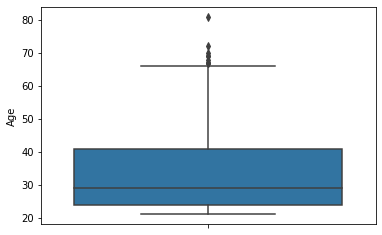

In [11]:
#Plot boxplot to check outliers.

col=list(df.columns)
col.remove('Outcome')

for i in col:
    sns.boxplot(y=df[i])
    plt.show()

- Above graph shows there are outliers present in all the attributes.

- We can remove outlier present in Glucose,BMI,BloodPressure column which have value as 0 as it is irrelevant value.

- Other outliers can be treated by reducing skewness or other methods.

In [14]:
#cheking skewness value

df[col].skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

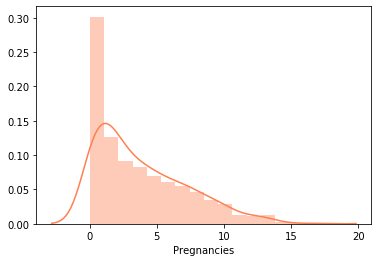

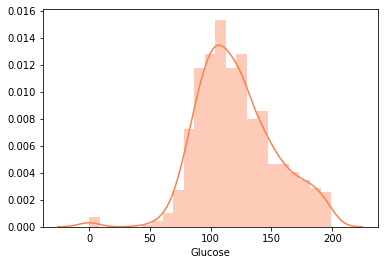

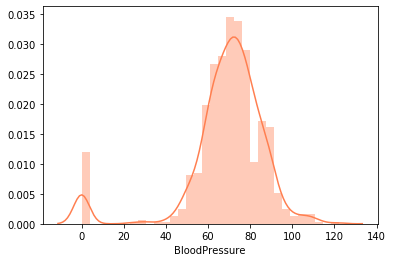

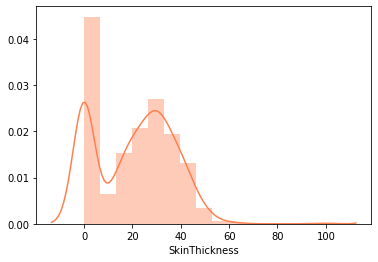

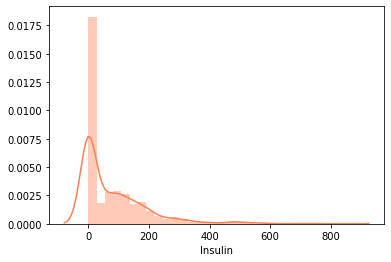

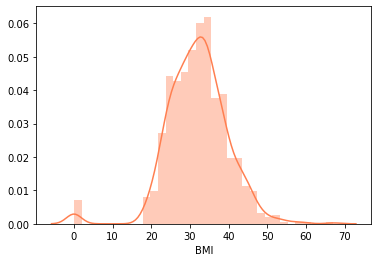

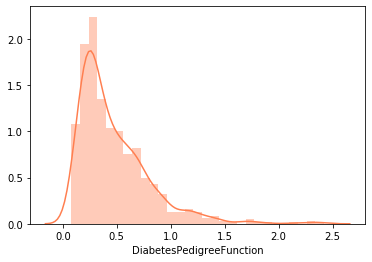

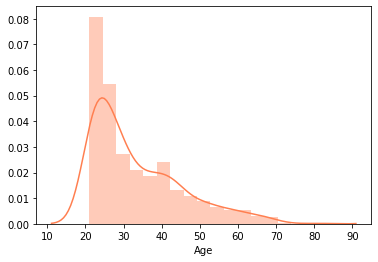

In [16]:
for i in col:
    sns.distplot(df[i],color='coral')
    plt.show()

- There is skewness present in the columns.

- As mentioned above there are some attributes which have value 0 i.e not possible in any human condition,we can remove them or to avoid data loss we can substitute value 0 with median value of the specific attribute.

In [17]:
for i in col:
    print(i,"-",df[df[i]==0].shape[0])

Pregnancies - 111
Glucose - 5
BloodPressure - 35
SkinThickness - 227
Insulin - 374
BMI - 11
DiabetesPedigreeFunction - 0
Age - 0


In [18]:
lst=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in lst:
    df[i]=df[i].apply(lambda x:df[i].median() if x==0 else x)

In [19]:
for i in col:
    print(i,"-",df[df[i]==0].shape[0])

Pregnancies - 111
Glucose - 0
BloodPressure - 0
SkinThickness - 0
Insulin - 0
BMI - 0
DiabetesPedigreeFunction - 0
Age - 0


- As seen some attributes that had value 0 is replaced with median value.

- In columns like Pregnancies value 0 is relevant value so we dont replace that value.

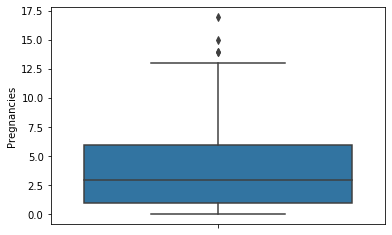

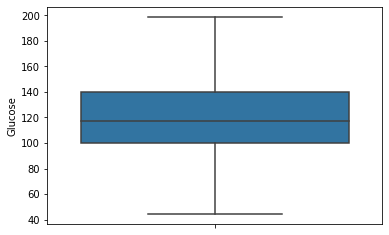

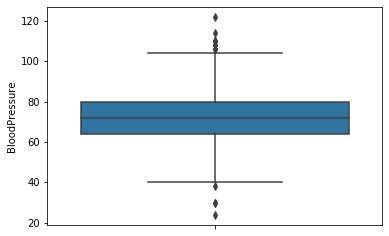

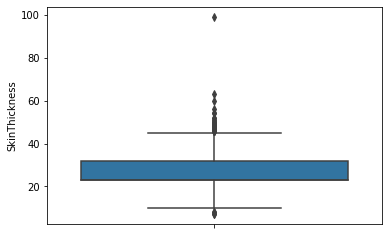

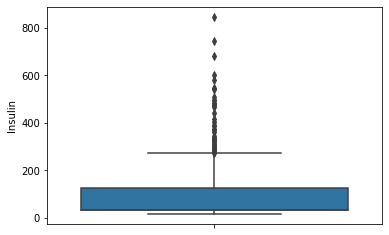

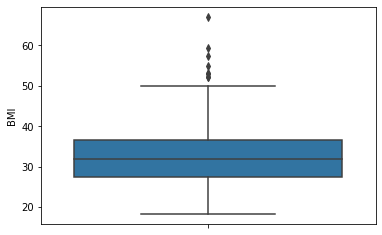

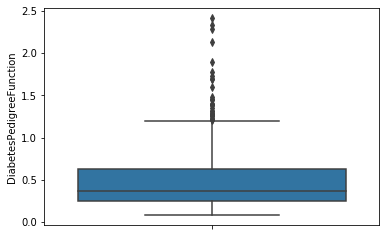

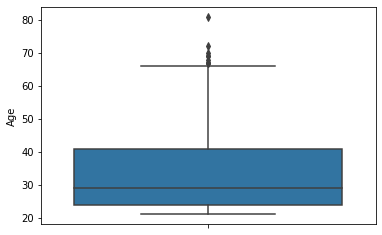

In [21]:
#Plotting Boxplot again

for i in col:
    sns.boxplot(y=df[i])
    plt.show()

- Glucose have no outlier present in it.

- We have seen above there is skewness present in the data,to reduce skewness in the data we use boxcox method.

In [22]:
#Making a list of columns that have skewness present in it
l=[]
for i in df.columns:
    if((df[i].skew()<0.1) or (df[i].skew()>0.2) and (i!='Outcome')):
        l.append(i)
l

['Pregnancies',
 'Glucose',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [23]:
for i in df.columns:
    if i in l:
        df[i]=list(st.boxcox(df[i]+1)[0])
        
df.skew()

Pregnancies                -0.044644
Glucose                    -0.001560
BloodPressure               0.141885
SkinThickness               0.015171
Insulin                     0.285163
BMI                        -0.000340
DiabetesPedigreeFunction    0.142321
Age                         0.150219
Outcome                     0.635017
dtype: float64

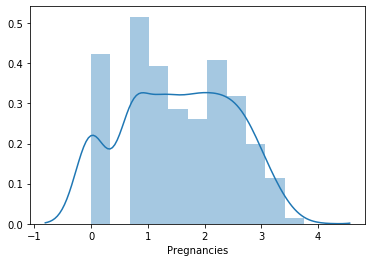

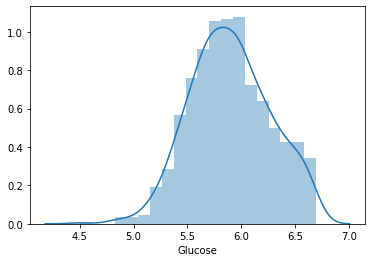

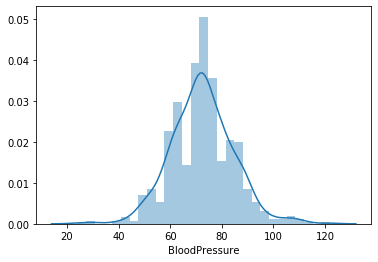

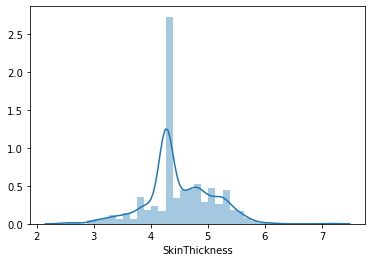

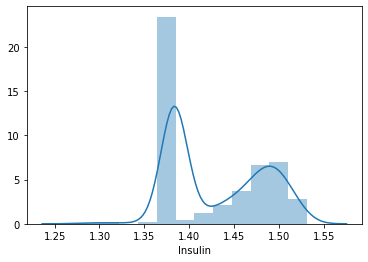

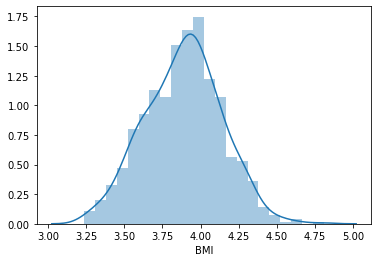

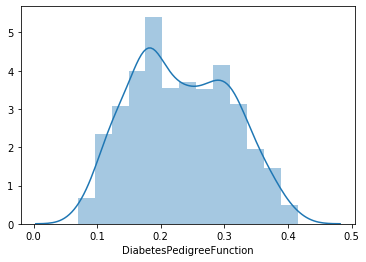

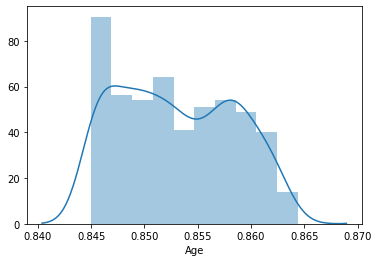

In [24]:
for i in col:
    sns.distplot(df[i])
    plt.show()

- Distplot helps us to show that the skewness is reduced and the graph looks better than before.

In [25]:
#Outlier treatment using z-score

d=st.zscore(df)

In [26]:
df=df[(abs(d)<3).all(axis=1)]

- Outliers are treated with z-score, under 3 sigma conditions that is with 99.7 percent of the data.

C:\Users\Kajal Chopda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Kajal Chopda\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


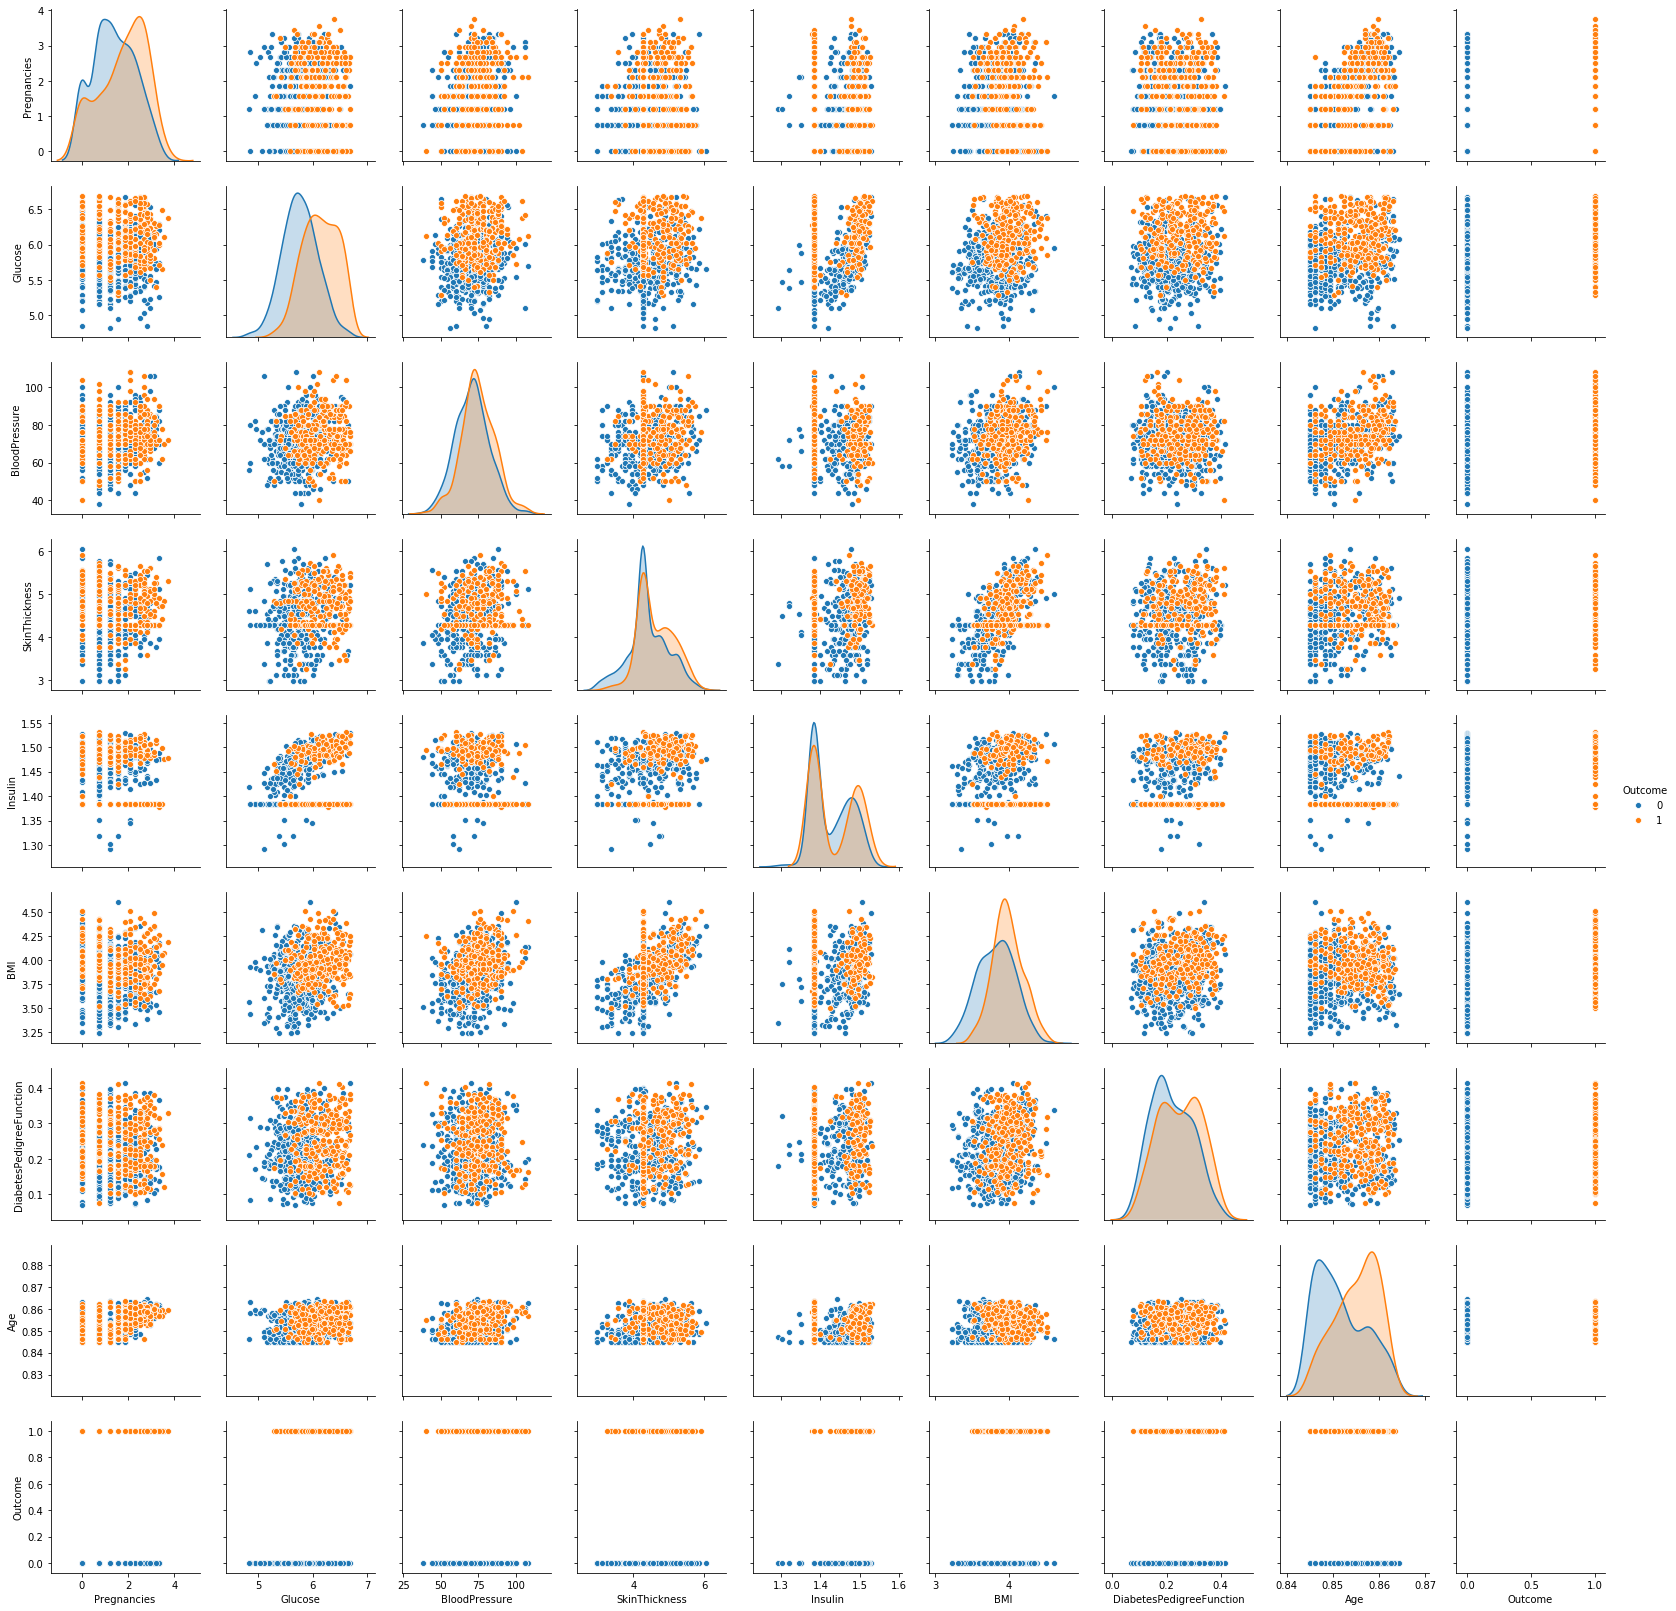

In [27]:
#Pairplot

sns.pairplot(df,hue='Outcome')
plt.show()

In [28]:
correlation=df.corr()

correlation.tail(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.191488,0.486679,0.16828,0.190404,0.076495,0.305391,0.178978,0.302491,1.0


- From the above values we see that Glucose is highly correlated with the target variable.

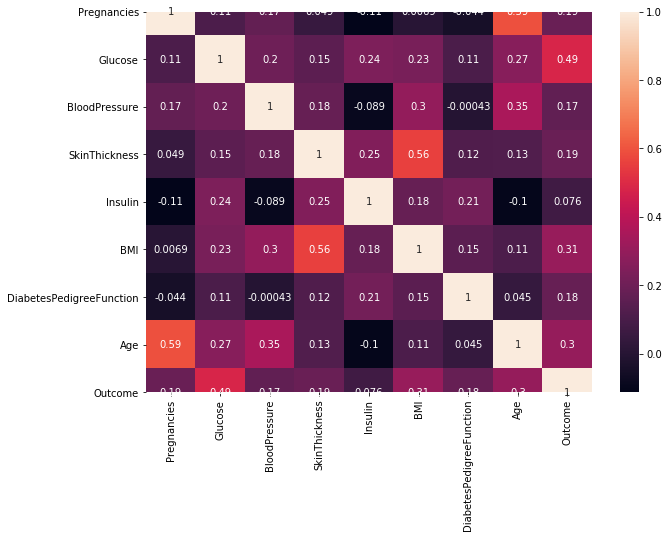

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(correlation,annot=True)
plt.show()

- Just looking at correlation value we cannot remove variables that are highly correlated,we will check with p-values,vif and then remove final attributes which will help to make better model.

In [32]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

Xc=sm.add_constant(X)

In [34]:
ols_model=sm.OLS(y,Xc).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     44.40
Date:                Tue, 26 May 2020   Prob (F-statistic):           2.60e-58
Time:                        18:13:14   Log-Likelihood:                -362.35
No. Observations:                 753   AIC:                             742.7
Df Residuals:                     744   BIC:                             784.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -13.2041      3.029     -4.359      0.000     -19.151      -7.257
Pregnancies                  0.0357      0.019      1.898      0.058      -0.001       0.073
Glucose                      0.5321      0.043     12.303      0.000       0.447       0.617
BloodPressure               -0.0017      0.001     -1.164      0.245      -0.004       0.001
SkinThickness                0.0064      0.032      0.197      0.844      -0.057       0.070
Insulin                     -0.6181      0.304     -2.034      0.042      -1.215      -0.021
BMI                          0.3838      0.074      5.194      0.000       0.239       0.529
DiabetesPedigreeFunction     0.7192      0.191      3.760      0.000       0.344       1.095
Age                         11.3433      3.578      3.170      0.002       4.319      18.367
==============================================================================
Omnibus:                       53.380   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.104
Skew:                           0.230   Prob(JB):                     5.83e-06
Kurtosis:                       2.254   Cond. No.                     2.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#VIF
vif=[variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=X.columns).T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
vif,1.563886,1.217022,1.275061,1.52691,1.229216,1.606052,1.072562,1.822547


As we can see that none of the features has multicollinearity i.e. vif is less than 2 for each features.
And also from the p-values given above that only 'BloodPressure' and 'SkinThickness' has p-values greater than 0.05 i.e. insignificant features.
But looking at all the parameters we should go with all the features for building basic model, then we will increase the accuracy if it is less than desired.

In [38]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<IPython.core.display.Javascript object>

(527, 8)
(226, 8)
(527,)
(226,)


For showing both train and test correct representative of the overall data statistically, we can use 
two-independent sample t-tests for mean.

In [40]:
#looking at only p-values
st.ttest_ind(X_train,X)[1]

array([0.92961792, 0.82937216, 0.33333285, 0.55288932, 0.86157559,
       0.68210624, 0.73464944, 0.63004662])

In [41]:
st.ttest_ind(X_test,X)[1]

array([0.87930489, 0.70266058, 0.08687726, 0.28916655, 0.76307035,
       0.48767513, 0.55383059, 0.39782976])

In [42]:
st.ttest_ind(y_train,y)[1]

0.9627665446874673

In [43]:
st.ttest_ind(y_test,y)[1]

0.935107657666887

As we can see that, the p-values for all the split is greater than 0.05 i.e. splitted data is correct representative of the whole data as our Null Hypothesis is failed to reject which states that the mean of the sample is equal to the mean of the population.

In [47]:
ss=StandardScaler()

X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [49]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
svc=SVC()

In [50]:
models=[]
models.append(('LR',lr))
models.append(('KNN',knn))
models.append(('RF',rf))
models.append(('SVC',svc))

In [51]:
results=[]
names=[]

for name,model in models:
    model.fit(X_train_ss,y_train)
    y_test_pred=model.predict(X_test_ss)
    
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    
    cv_results=cross_val_score(model,X_train_ss,y_train,cv=kfold,scoring='accuracy')
    
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    
    print("%s: %f (%f)"%(name,np.mean(cv_results)*100,np.var(cv_results,ddof=1)))
    print('Classification Report - Test:',name)
    print(classification_report(y_test,y_test_pred))

LR: 75.521645 (0.001163)
Classification Report - Test: LR
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       147
           1       0.70      0.63      0.67        79

    accuracy                           0.78       226
   macro avg       0.76      0.75      0.75       226
weighted avg       0.77      0.78      0.78       226

KNN: 71.535714 (0.000107)
Classification Report - Test: KNN
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       147
           1       0.63      0.61      0.62        79

    accuracy                           0.74       226
   macro avg       0.71      0.71      0.71       226
weighted avg       0.74      0.74      0.74       226

RF: 73.809524 (0.000942)
Classification Report - Test: RF
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       147
           1       0.71      0.71      0.71        79

    ac

- F1 score is used to compare which model is best to use but itcannot be considered for global accuracy.

- I'm fitting 4 base models because all these four models runs on different types of algorithms, based on which we can get the best fitted model which has higher accuracy than others. After looking at the classification report of the each model, we find that RandomForest and Support Vector(SVC) has high f1-score in comparision with other models. So we can consider the RandomForest for going further.

For RandomForestClassifier the overall accuracy of test is 78 percent which is less than desired, so we will have to do some transformations so that our overall accuracy should increase more.

In [52]:
rfc=RandomForestClassifier()
rfc.fit(X_train_ss,y_train)

kfold=KFold(shuffle=True,n_splits=3,random_state=0)
cv_results=cross_val_score(rfc,X_train_ss,y_train,cv=kfold,scoring='accuracy')

y_test_pred=rfc.predict(X_test_ss)

print('Random Forest: ',np.mean(cv_results)*100,np.var(cv_results,ddof=1))
print('Classification Report - Test:',name)
print(classification_report(y_test,y_test_pred))

Random Forest:  74.57034632034633 0.0002254662815539438
Classification Report - Test: SVC
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       147
           1       0.69      0.63      0.66        79

    accuracy                           0.77       226
   macro avg       0.75      0.74      0.75       226
weighted avg       0.77      0.77      0.77       226



From the above observation we will have to optimize the model, since we can go for hyperparameter tuning and also forward inclusion or backward elimination feature techniques but as we can see above that features are not overfitting or there is no multicollinearity exists, so we will first go for hyperparameter tuning.

In [55]:
#Hyperparameter tuning for Random Forest using RandomizedSearchCV.

rfc=RandomForestClassifier(random_state=3)
params={
    'n_estimators':sp_randint(50,100),
    'max_depth':sp_randint(2,10),
    'min_samples_leaf':sp_randint(1,50),
    'min_samples_split':sp_randint(2,50),
    'max_features':sp_randint(2,15),
    'criterion':['gini','entropy']
}
rsearch=RandomizedSearchCV(rfc,param_distributions=params,cv=3,n_iter=200,scoring='roc_auc',n_jobs=-1,random_state=3)
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [56]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 33,
 'n_estimators': 57}

In [60]:
rfc=RandomForestClassifier(**rsearch.best_params_,random_state=3)
rfc.fit(X_train,y_train)

y_train_pred=rfc.predict(X_train) #It will give 01 instead of probability using by default cutoff 0.5
y_train_prob=rfc.predict_proba(X_train)[:,1]

y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]

print('Confusion Matrix - Train: ', '\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train: ', accuracy_score(y_train,y_train_pred))
print('Classification Report - Train: ', classification_report(y_train,y_train_pred))
print('AUC Score - Train: ', roc_auc_score(y_train,y_train_prob))

print('\n'*2)

print('Confusion Matrix - Test: ', '\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test: ', accuracy_score(y_test,y_test_pred))
print('Classification Report - Test: ', classification_report(y_test,y_test_pred))
print('AUC Score - Test: ', roc_auc_score(y_test,y_test_prob))

Confusion Matrix - Train:  
 [[315  30]
 [ 53 129]]
Accuracy Score - Train:  0.8425047438330171 /n

 Classification Report - Train:                precision    recall  f1-score   support

           0       0.86      0.91      0.88       345
           1       0.81      0.71      0.76       182

    accuracy                           0.84       527
   macro avg       0.83      0.81      0.82       527
weighted avg       0.84      0.84      0.84       527

AUC Score - Train:  0.9241758241758241



Confusion Matrix - Test:  
 [[125  22]
 [ 28  51]]
Accuracy Score - Test:  0.7787610619469026

 Classification Report - Test:                precision    recall  f1-score   support

           0       0.82      0.85      0.83       147
           1       0.70      0.65      0.67        79

    accuracy                           0.78       226
   macro avg       0.76      0.75      0.75       226
weighted avg       0.78      0.78      0.78       226

AUC Score - Test:  0.8486179281839318


As we can see that AUC score of Train is 92.41% and AUC socre of Test is 84.86% means case of overfitting.
We will remove the insignificant columns and finally fit the model.

In [61]:
model=sm.Logit(y,Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.454301
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  753
Model:                          Logit   Df Residuals:                      744
Method:                           MLE   Df Model:                            8
Date:                Tue, 26 May 2020   Pseudo R-squ.:                  0.2960
Time:                        22:12:50   Log-Likelihood:                -342.09
converged:                       True   LL-Null:                       -485.93
Covariance Type:            nonrobust   LLR p-value:                 1.719e-57
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -89.2927     20.246     -4.410      0.000    -128.973     -49.612
Pregnancies                  0.2344      0.122      1.924      0.054      -0.004       0.473
Glucose                      3.2495      0.327      9.948      0.000       2.609       3.890
BloodPressure               -0.0125      0.009     -1.340      0.180      -0.031       0.006
SkinThickness                0.0777      0.216      0.359      0.719      -0.346       0.502
Insulin                     -3.6902      1.967     -1.876      0.061      -7.546       0.166
BMI                          2.7050      0.522      5.178      0.000       1.681       3.729
DiabetesPedigreeFunction     4.5395      1.274      3.562      0.000       2.042       7.037
Age                         73.9376     23.437      3.155      0.002      28.002     119.873
============================================================================================
"""

In [62]:
#Removing insignificant features(p-values>0.05)

cols=list(Xc.columns)
while(len(cols)>0):
    x_1=Xc[cols]
    model=sm.Logit(y,x_1).fit()
    p=model.pvalues
    
    feature_maxp=p.idxmax()
    pmax=max(p)
    if(pmax>0.05):
        cols.remove(feature_maxp)
    else:
        break
        
cols

Optimization terminated successfully.
         Current function value: 0.454301
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.454387
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.455575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.457478
         Iterations 7


['const', 'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [63]:
#Taking only the significant columns and fitting the model again
new_lstofcol=['const', 'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Xc=Xc[new_lstofcol]
model=sm.Logit(y,Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.457478
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  753
Model:                          Logit   Df Residuals:                      747
Method:                           MLE   Df Model:                            5
Date:                Tue, 26 May 2020   Pseudo R-squ.:                  0.2911
Time:                        22:21:45   Log-Likelihood:                -344.48
converged:                       True   LL-Null:                       -485.93
Covariance Type:            nonrobust   LLR p-value:                 4.748e-59
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -91.6543     18.860     -4.860      0.000    -128.620     -54.689
Pregnancies                  0.2412      0.121      1.991      0.047       0.004       0.479
Glucose                      3.0734      0.311      9.891      0.000       2.464       3.682
BMI                          2.5084      0.432      5.810      0.000       1.662       3.355
DiabetesPedigreeFunction     4.2266      1.245      3.396      0.001       1.787       6.666
Age                         72.0596     22.214      3.244      0.001      28.521     115.599
============================================================================================
"""

In [64]:
#Splitting the new dataframe again and fitting the model with hyperparameter also.
X_train, X_test , y_train, y_test = train_test_split(Xc,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<IPython.core.display.Javascript object>

(527, 6)
(226, 6)
(527,)
(226,)


In [65]:
#Fitting the final model

X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [66]:
rfc=RandomForestClassifier(**rsearch.best_params_,random_state=3)
rfc.fit(X_train_ss,y_train)

y_train_pred=rfc.predict(X_train_ss) #It will give 01 instead of probability using by default cutoff 0.5
y_train_prob=rfc.predict_proba(X_train_ss)[:,1]

y_test_pred=rfc.predict(X_test_ss)
y_test_prob=rfc.predict_proba(X_test_ss)[:,1]

print('Confusion Matrix - Train: ', '\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train: ', accuracy_score(y_train,y_train_pred))
print('Classification Report - Train: ', classification_report(y_train,y_train_pred))
print('AUC Score - Train: ', roc_auc_score(y_train,y_train_prob))

print('\n'*2)

print('Confusion Matrix - Test: ', '\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test: ', accuracy_score(y_test,y_test_pred))
print('Classification Report - Test: ', classification_report(y_test,y_test_pred))
print('AUC Score - Test: ', roc_auc_score(y_test,y_test_prob))

Confusion Matrix - Train:  
 [[314  31]
 [ 58 124]]
Accuracy Score - Train:  0.8311195445920304
Classification Report - Train:                precision    recall  f1-score   support

           0       0.84      0.91      0.88       345
           1       0.80      0.68      0.74       182

    accuracy                           0.83       527
   macro avg       0.82      0.80      0.81       527
weighted avg       0.83      0.83      0.83       527

AUC Score - Train:  0.9190157668418538



Confusion Matrix - Test:  
 [[126  21]
 [ 27  52]]
Accuracy Score - Test:  0.7876106194690266
Classification Report - Test:                precision    recall  f1-score   support

           0       0.82      0.86      0.84       147
           1       0.71      0.66      0.68        79

    accuracy                           0.79       226
   macro avg       0.77      0.76      0.76       226
weighted avg       0.78      0.79      0.79       226

AUC Score - Test:  0.8497373632997502


As we can see that overfitting is slightly reduced from before after removing the insignificant columns
also, as we know that AUC score is best matric for deciding whether a model is good or not so from the 
above we got AUC score for test is 84.97 percent if, threshold is 0.5 and accuracy of test is 78.76 percent.

In [68]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)
giniDecisionTree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

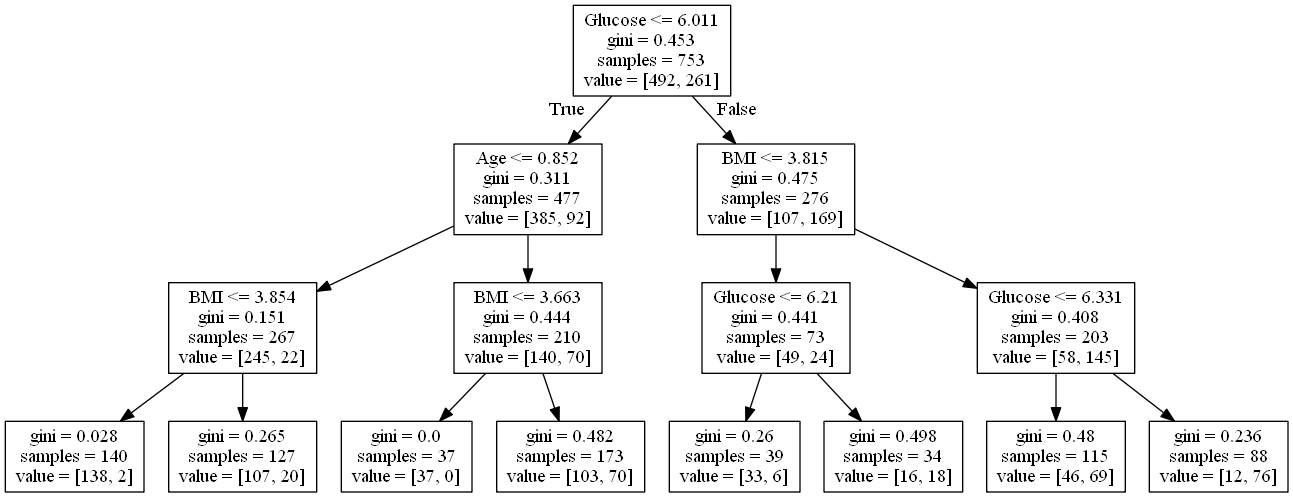

In [80]:
features = X.columns
# Create DOT data
dot_data = export_graphviz(giniDecisionTree, out_file=None, feature_names=features)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 
# Show graph
Image(graph.create_png())

Inference:

From the above decision tree we can see that Glucose is giving us the best purity level after that BMI and age is more impacting on the diabetes condition of the patient if Glucose less than 6.011 than Age is more imapact upon the diabitic condition, if glucose level is more than 6.011 then bmi is affecting more on the diabitic condition of the patient.